In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline


In [2]:
df = pd.read_csv('propulsion.csv')
df.head()

Unnamed: 0  Lever position (lp) [ ]  Ship speed (v) [knots]  \
0           0                    9.300                    27.0   
1           1                    6.175                    18.0   
2           2                    3.144                     9.0   
3           3                    3.144                     9.0   
4           4                    6.175                    18.0   

   Gas Turbine shaft torque (GTT) [kN m]  \
0                              72762.205   
1                              29760.552   
2                               8375.774   
3                               8377.589   
4                              29761.091   

   Gas Turbine rate of revolutions (GTn) [rpm]  \
0                                     3560.393   
1                                     2306.825   
2                                     1386.739   
3                                     1386.748   
4                                     2306.825   

   Gas Generator rate of revolutions (GGn) [rpm]  \
0                                       9753.812   
1                                       8780.012   
2                                       7051.621   
3                                       7098.469   
4                                       8782.024   

   Starboard Propeller Torque (Ts) [kN]  Port Propeller Torque (Tp) [kN]  \
0                               644.806                          644.806   
1                               246.011                          246.011   
2                                60.318                           60.318   
3                                60.339                           60.339   
4                               246.021                          246.021   

   HP Turbine exit temperature (T48) [C]  \
0                               1086.583   
1                                776.921   
2                                589.764   
3                                570.651   
4                                769.855   

   GT Compressor inlet air temperature (T1) [C]  \
0                                         288.0   
1                                         288.0   
2                                         288.0   
3                                         288.0   
4                                         288.0   

   GT Compressor outlet air temperature (T2) [C]  \
0                                        780.304   
1                                        665.511   
2                                        580.587   
3                                        576.565   
4                                        663.682   

   HP Turbine exit pressure (P48) [bar]  \
0                                 4.523   
1                                 2.518   
2                                 1.392   
3                                 1.390   
4                                 2.518   

   GT Compressor inlet air pressure (P1) [bar]  \
0                                        0.998   
1                                        0.998   
2                                        0.998   
3                                        0.998   
4                                        0.998   

   GT Compressor outlet air pressure (P2) [bar]  \
0                                        22.879   
1                                        13.438   
2                                         7.566   
3                                         7.409   
4                                        13.374   

   Gas Turbine exhaust gas pressure (Pexh) [bar]  \
0                                          1.050   
1                                          1.030   
2                                          1.020   
3                                          1.021   
4                                          1.031   

   Turbine Injecton Control (TIC) [%]  Fuel flow (mf) [kg/s]  \
0                              90.435                  1.790   
1                              34.596                  0.685   
2            

In [3]:
df.shape

(10000, 19)

In [4]:
df.isna().sum()

Unnamed: 0                                       0
Lever position (lp) [ ]                          0
Ship speed (v) [knots]                           0
Gas Turbine shaft torque (GTT) [kN m]            0
Gas Turbine rate of revolutions (GTn) [rpm]      0
Gas Generator rate of revolutions (GGn) [rpm]    0
Starboard Propeller Torque (Ts) [kN]             0
Port Propeller Torque (Tp) [kN]                  0
HP Turbine exit temperature (T48) [C]            0
GT Compressor inlet air temperature (T1) [C]     0
GT Compressor outlet air temperature (T2) [C]    0
HP Turbine exit pressure (P48) [bar]             0
GT Compressor inlet air pressure (P1) [bar]      0
GT Compressor outlet air pressure (P2) [bar]     0
Gas Turbine exhaust gas pressure (Pexh) [bar]    0
Turbine Injecton Control (TIC) [%]               0
Fuel flow (mf) [kg/s]                            0
GT Compressor decay state coefficient.           0
GT Turbine decay state coefficient.              0
dtype: int64

In [5]:
df.describe()

Unnamed: 0  Lever position (lp) [ ]  Ship speed (v) [knots]  \
count  10000.00000             10000.000000            10000.000000   
mean    4999.50000                 5.150075               14.951400   
std     2886.89568                 2.624015                7.740467   
min        0.00000                 1.138000                3.000000   
25%     2499.75000                 3.144000                9.000000   
50%     4999.50000                 5.140000               15.000000   
75%     7499.25000                 7.148000               21.000000   
max     9999.00000                 9.300000               27.000000   

       Gas Turbine shaft torque (GTT) [kN m]  \
count                           10000.000000   
mean                            27100.647714   
std                             22062.780307   
min                               253.547000   
25%                              8375.791500   
50%                             21630.133500   
75%                             39000.710250   
max                             72783.338000   

       Gas Turbine rate of revolutions (GTn) [rpm]  \
count                                 10000.000000   
mean                                   2131.151788   
std                                     772.211732   
min                                    1307.675000   
25%                                    1386.758000   
50%                                    1924.325000   
75%                                    2678.078000   
max                                    3560.741000   

       Gas Generator rate of revolutions (GGn) [rpm]  \
count                                   10000.000000   
mean                                     8194.182366   
std                                      1090.569425   
min                                      6589.002000   
25%                                      7056.520500   
50%                                      8480.527000   
75%                                      9132.132500   
max                                      9797.103000   

       Starboard Propeller Torque (Ts) [kN]  Port Propeller Torque (Tp) [kN]  \
count                          10000.000000                     10000.000000   
mean                             225.957785                       225.957785   
std                              199.737886                       199.737886   
min                                5.304000                         5.304000   
25%                               60.317000                        60.317000   
50%                              175.264000                       175.264000   
75%                              332.360000                       332.360000   
max                              645.249000                       645.249000   

       HP Turbine exit temperature (T48) [C]  \
count                           10000.000000   
mean                              734.476178   
std                               173.009157   
min                               444.731000   
25%                               589.841000   
50%                               705.351000   
75%                               833.154750   
max                              1115.797000   

       GT Compressor inlet air temperature (T1) [C]  \
count                                       10000.0   
mean                                          288.0   
std                                             0.0   
min                                           288.0   
25%                                           288.0   
50%                                           288.0   
75%                                           288.0   
max                                           288.0   

       GT Compressor outlet air temperature (T2) [C]  \
count                                   10000.000000   
mean                                      645.748980   
std                                        72.483036   
min                                       540.999000   
25%          

from the above table we can prettymuch see max min values and mean and median are almost similar
that implies there are not many outliers
apart from that we can see that Starboard Propeller Torque (Ts)[kN] and Port Propeller Torque (Tp)[kN]
has similar values

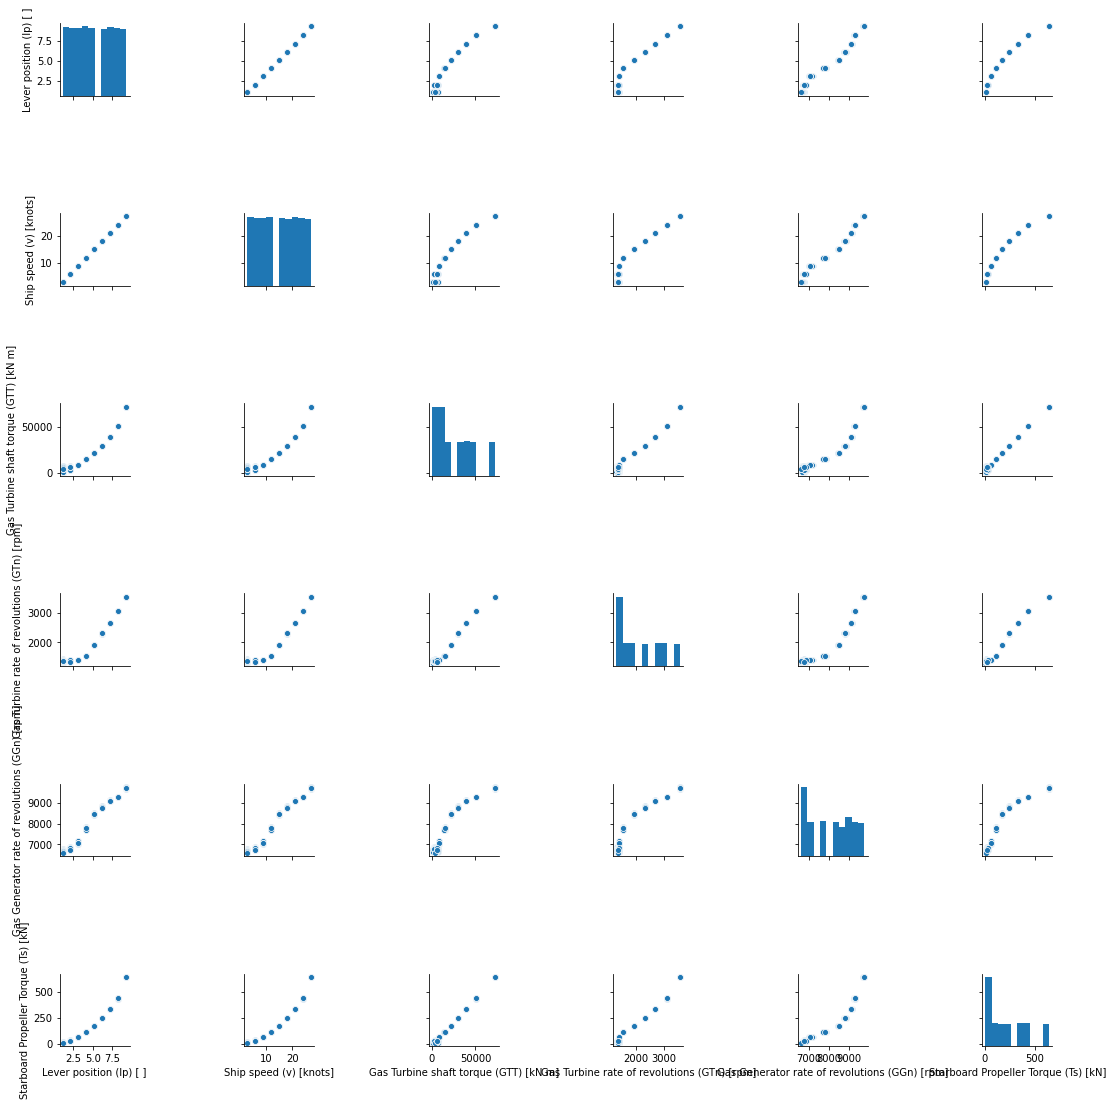

In [6]:
#since pairplots for all the columns is very difficult to understand here 
#the pairplots of first 5 columns
sns.pairplot(df.iloc[:,[1,2,3,4,5,6]])

from the above plots we can conclude that there is a linear relationship between two variables

In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
x=df.drop(['GT Compressor decay state coefficient.','GT Turbine decay state coefficient.'],axis=1)
y=df[['GT Compressor decay state coefficient.','GT Turbine decay state coefficient.']]


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
models=[('lir',LinearRegression()),
       ('decisiontreeregressor',DecisionTreeRegressor()),
       ('randomforest',RandomForestRegressor()),
       ("KNN",KNeighborsRegressor())]

In [11]:
models

[('lir',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('decisiontreeregressor',
  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort=False, random_state=None, splitter='best')),
 ('randomforest',
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators='warn',
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)),
 ('KNN',
 

In [13]:
for name,model in models:
    clf = MultiOutputRegressor(model)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(name)
    print(r2_score(y_test,y_pred))
    print(np.sqrt(mean_squared_error(y_test,y_pred)))
    

lir
0.8800183347266308
0.004340487257577371
decisiontreeregressor
0.9775969698751948
0.001589008583963756
randomforest
0.9874020337308069
0.0012091137085175334
KNN
0.8947553901812888
0.0034125825997329364


randomforestregressor has high r2score and low rmse we can further move forward with rfr

In [14]:
x=df.drop(['GT Compressor decay state coefficient.','GT Turbine decay state coefficient.'],axis=1)
y=df['GT Compressor decay state coefficient.']
y1 = df['GT Turbine decay state coefficient.']


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
from sklearn.model_selection import RandomizedSearchCV
rfr = RandomForestRegressor()

In [21]:

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [22]:
random_grid

{'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [23]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=4, random_state=42, n_jobs = -1)

In [24]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   16.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [26]:
rf_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'bootstrap': False}

In [28]:
best = rf_random.best_estimator_

In [29]:
best.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [39]:
y_pred = best.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))
print("rmse_score",np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score 0.9919543055570047
rmse_score 0.0013155417135157662
